# 🌟 **Internship Task 4 at Prodigy Infotec: Generative AI Intern**

## 🌟 **Image-to-Image Translation with CGAN (pix2pix)**

### 🖼️ **Task 4 Overview:**
In this project, you will implement an image-to-image translation model using a **Conditional Generative Adversarial Network (CGAN)**, specifically the **pix2pix** model. This approach allows you to transform one type of image into another based on a conditional input. For example:
- **Day to Night**: Convert a daytime image to a nighttime version.
- **Sketch to Photo**: Convert a sketch into a photo-like image.
- **Black and White to Color**: Colorize grayscale images.

The **pix2pix** model is widely used in many real-world applications like image enhancement, super-resolution, and even creating artwork from sketches.

---

### 🎯 **How You’ll Achieve This:**

1. **Data Preprocessing**:
   - You'll start by loading datasets with paired images (e.g., daytime/nighttime images or sketch/photo pairs).
   - You'll preprocess these images to ensure they are in the right format for the model (resizing, normalization, etc.).

2. **Building the CGAN Model (pix2pix)**:
   - The **Generator** in pix2pix will take an input image (e.g., a sketch or a daytime photo) and generate an output image (e.g., a photo or a nighttime version of the photo).
   - The **Discriminator** will try to classify images as either real (from the dataset) or fake (generated by the model).
   
3. **Conditional GAN**:
   - Unlike regular GANs, CGANs condition both the generator and the discriminator on the input image. This means that the output generated by the generator is influenced by the input image, which is what allows image translation to occur.

4. **Training the Model**:
   - You will train both the generator and discriminator simultaneously. During training, the generator tries to improve in creating realistic images while the discriminator tries to get better at distinguishing real from fake images.
   - The model will learn to produce high-quality translations of the input images into output images.

5. **Loss Function**:
   - You’ll use a combination of:
     - **Adversarial Loss**: Ensures the generator creates realistic images.
     - **L2 Loss (Pixel-wise loss)**: Ensures that the generated image closely matches the ground truth image on a pixel level.

6. **Testing and Evaluation**:
   - Once trained, you’ll test the model by providing new input images and generating corresponding translated images.
   - The quality of the generated images will be evaluated by visually inspecting them and checking if they realistically map the input images to the output domain.

---

### 🚀 **Outcome:**

By the end of this project, you will have:
- Implemented a **pix2pix** CGAN model for image-to-image translation tasks.
- Gained experience in **conditional GANs** and their applications for generating realistic images from input conditions.
- Built a strong understanding of how to use GANs in various creative and practical applications like image enhancement, artistic creation, and domain transformation.

This project will give you hands-on experience in the rapidly growing field of image generation and manipulation using deep learning.


# 🖼️ Loading Content and Style Images  

### Steps:  
1. **Define `load_image` Function**  
   - Reads an image file from a path.
   - Decodes the image as a JPEG with 3 color channels (RGB).
   - Converts the image to `float32` for further processing.
   - Resizes the image to a fixed size of 256x256.
   - Adds a batch dimension to the image, making it compatible with TensorFlow models.

2. ✅ **Image Ready for Use**  
   - The image is now prepared and ready for input into a model or further processing.  


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the content and style images
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (256, 256))  # Resize the image
    img = img[tf.newaxis, :]  # Add batch dimension
    return img

## 🌄 Load and Preprocess Images for Neural Style Transfer  

### Steps:  
1. **Load Content and Style Images**  
   - Define paths to the content and style images.
   - Load both images using the `load_image()` function.

2. **Preprocess the Images**  
   - Convert image values from the [0, 1] range to [-1, 1] to match the expected input range for models in neural style transfer.
   - This is achieved by multiplying by 2 and subtracting 1.

3. ✅ **Images Ready**  
   - Both content and style images are now preprocessed and prepared for style transfer processing.  


In [2]:
# Load content and style images
content_image_path = r"C:\Users\mdimr\OneDrive\Pictures\Neural style transfer\content.jpg"  # Your content image (e.g., a photo)
style_image_path = r"C:\Users\mdimr\OneDrive\Pictures\Neural style transfer\style .jpg"  # Your style image (e.g., a famous painting)

# Load the images
content_image = load_image(content_image_path)
style_image = load_image(style_image_path)

# Preprocess the images: from [0, 1] to [-1, 1]
def preprocess_image(img):
    return img * 2.0 - 1.0

content_image = preprocess_image(content_image)
style_image = preprocess_image(style_image)

## 🧠 Load Pre-trained VGG19 Model  

### Steps:  
1. **Load VGG19 Model**  
   - Use TensorFlow's `tf.keras.applications.VGG19` to load the VGG19 model.
   - Set `include_top=False` to exclude the final classification layers (we only need feature extraction).
   - Load pre-trained weights from ImageNet to leverage the model's ability to capture visual features.

2. ✅ **VGG19 Ready for Feature Extraction**  
   - The model is now loaded and ready to extract features from content and style images for style transfer.  


In [3]:
# Load VGG19 model, used for feature extraction
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')



## 🧑‍💻 Build Model and Loss Functions for Style Transfer  

### Steps:  

1. **Create Model for Feature Extraction**  
   - Define content and style layers to extract relevant features.
   - Freeze VGG19 layers (no training) to use as a feature extractor.
   - Build a new model that outputs features from both content and style layers.

2. **Calculate Loss Functions**  
   - **Content Loss**: Measures the difference between the content in the generated image and the original content image using Mean Squared Error (MSE).
   - **Style Loss**: Measures the difference between the style of the generated image and the style image using MSE across selected style layers.
   - **Total Variation Loss**: Reduces image noise by applying a smoothness penalty to the generated image, using total variation calculation.

3. ✅ **Model and Loss Functions Ready**  
   - The model for feature extraction is set up and the loss functions are defined to guide the optimization in neural style transfer.  


In [4]:
def get_model():
    content_layers = ['block5_conv2']
    style_layers = [
        'block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'
    ]

    # Freeze the model so that we don't update its weights
    vgg.trainable = False
    
    # We will extract features from these layers
    output_layers = style_layers + content_layers
    
    model = tf.keras.models.Model(inputs=vgg.input, outputs=[vgg.get_layer(name).output for name in output_layers])
    return model

# Get model to extract content and style features
model = get_model()

# Calculate content loss
def get_content_loss(base_content, target):
    return tf.reduce_mean(tf.square(base_content - target))

# Calculate style loss
def get_style_loss(base_style, target):
    return tf.reduce_mean(tf.square(base_style - target))

# Calculate total variation loss (to reduce image noise)
def get_total_variation_loss(image):
    return tf.reduce_mean(tf.image.total_variation(image))

## 🎨 Neural Style Transfer: Blending Content & Style

In this guide, we combine the **content** of one image with the **style** of another, creating a unique artistic result.

---

#### 1. 🧑‍💻 **Loss Functions**
- **Content Loss**: Measures the difference in content between the generated and the content image.
- **Style Loss**: Compares the style features between the generated and style image.
- **Total Variation Loss**: Reduces noise in the generated image by promoting smoothness.

---

#### 2. 🖼️ **Steps to Apply Style Transfer**

- **Initialize the Generated Image**: Start with the content image.
- **Optimize the Image**: Use the Adam optimizer to adjust the image to minimize the total loss.
- **Compute Losses**:
  - 🖌️ **Content Loss**: Compare content features.
  - 🎨 **Style Loss**: Compare style features across different layers of the model.
  - 🧑‍🔬 **Total Variation Loss**: Smooth out the image to remove artifacts.
  
---

#### 3. 🔄 **Training Process**
- **Iterations**: Continuously adjust the generated image by calculating and minimizing the combined losses.
- **Display Results**: Show the output image after the training process.

---

This method creates an image that preserves the content of one picture, while adopting the artistic style of another! 🎨🖼️


In [5]:
# Define the style transfer function
def style_transfer(content_image, style_image, num_iterations=1000, learning_rate=5e-3):
    # Define the layers for content and style
    style_layers = [
        'block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'
    ]
    content_layers = ['block5_conv2']

    # Initialize the generated image as the content image
    generated_image = tf.Variable(content_image)

    # Optimizer
    optimizer = tf.optimizers.Adam(learning_rate)

    # Compute target features for both content and style
    style_targets = model(style_image)[:len(style_layers)]
    content_targets = model(content_image)[-1]

    # Training loop
    for i in range(num_iterations):
        with tf.GradientTape() as tape:
            # Compute features for the generated image
            all_features = model(generated_image)
            style_features = all_features[:len(style_layers)]
            content_features = all_features[-1]

            # Compute losses
            content_loss = get_content_loss(content_features, content_targets)
            style_loss = sum([get_style_loss(style_feature, style_target) for style_feature, style_target in zip(style_features, style_targets)])
            tv_loss = get_total_variation_loss(generated_image)

            # Total loss
            total_loss = content_loss + 0.025 * style_loss + 0.1 * tv_loss
        
        # Compute gradients and apply them
        grads = tape.gradient(total_loss, generated_image)
        optimizer.apply_gradients([(grads, generated_image)])
        
        # Print progress
        if i % 10 == 0:
            print(f"Iteration {i}, Total Loss: {total_loss.numpy()}")

    return generated_image

## 🎨 Neural Style Transfer: Result Generation

In this step, we perform the style transfer using the previously defined function. The `style_transfer` function combines the **content** of the content image with the **style** of the style image, producing a unique artistic output.

---

#### 🖼️ **Generated Image**
After running the style transfer, the resulting image blends the content of the content image with the artistic style of the style image.



In [6]:
# Perform the style transfer
result_image = style_transfer(content_image, style_image)

Iteration 0, Total Loss: 5067.77978515625
Iteration 10, Total Loss: 3887.3564453125
Iteration 20, Total Loss: 3253.417236328125
Iteration 30, Total Loss: 2814.32861328125
Iteration 40, Total Loss: 2480.582763671875
Iteration 50, Total Loss: 2217.327392578125
Iteration 60, Total Loss: 2005.0655517578125
Iteration 70, Total Loss: 1829.929931640625
Iteration 80, Total Loss: 1682.8538818359375
Iteration 90, Total Loss: 1557.581298828125
Iteration 100, Total Loss: 1449.8189697265625
Iteration 110, Total Loss: 1356.2940673828125
Iteration 120, Total Loss: 1274.86376953125
Iteration 130, Total Loss: 1203.9959716796875
Iteration 140, Total Loss: 1141.5872802734375
Iteration 150, Total Loss: 1085.9906005859375
Iteration 160, Total Loss: 1036.606201171875
Iteration 170, Total Loss: 992.281494140625
Iteration 180, Total Loss: 952.0444946289062
Iteration 190, Total Loss: 915.55126953125
Iteration 200, Total Loss: 882.0609130859375
Iteration 210, Total Loss: 851.5054321289062
Iteration 220, Total L

## 🖼️ Displaying Content, Style, and Result Images

After performing the style transfer, we visualize the following images:

1. **Content Image**: The original image whose content we want to retain.
2. **Style Image**: The image whose style (textures, colors, patterns) we aim to apply to the content image.
3. **Result Image**: The final output, where the content from the content image is combined with the style from the style image.


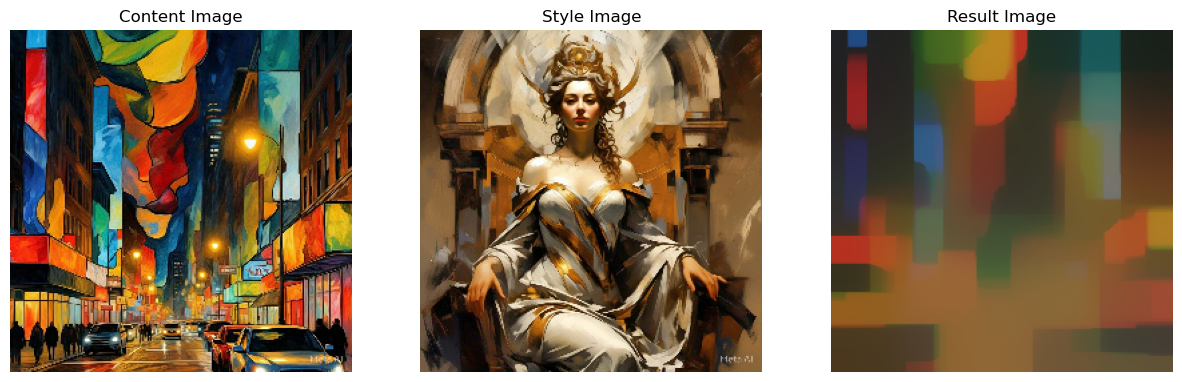

In [7]:
# De-process image for display (convert [-1, 1] back to [0, 255])
def deprocess_image(img):
    img = (img + 1.0) * 127.5  # Convert to [0, 255]
    img = np.array(img, dtype=np.uint8)
    return img[0]  # Remove batch dimension

# Display the images: Content, Style, and Result
plt.figure(figsize=(15, 10))

# Content image
plt.subplot(1, 3, 1)
plt.imshow(deprocess_image(content_image))
plt.title("Content Image")
plt.axis('off')

# Style image
plt.subplot(1, 3, 2)
plt.imshow(deprocess_image(style_image))
plt.title("Style Image")
plt.axis('off')

# Result image (Neural Style Transfer Output)
plt.subplot(1, 3, 3)
plt.imshow(deprocess_image(result_image))
plt.title("Result Image")
plt.axis('off')

plt.show()
